In [0]:
import cv2
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

def url_to_image(url):
  print("downloading %s" % (url))
  return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/text/text1.jpg


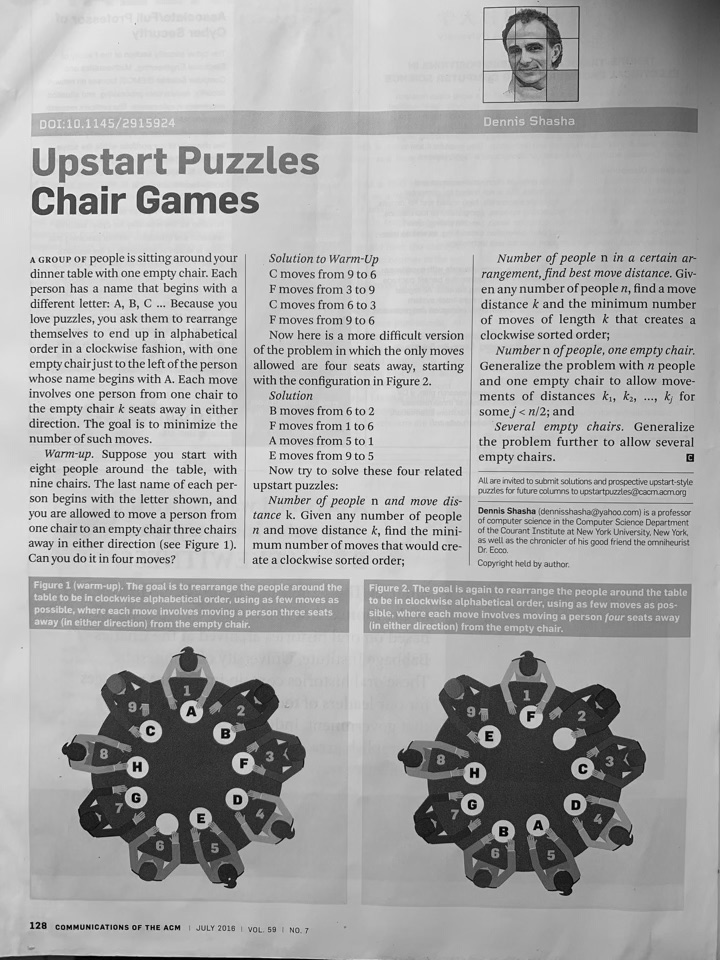

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/text/text2.jpg


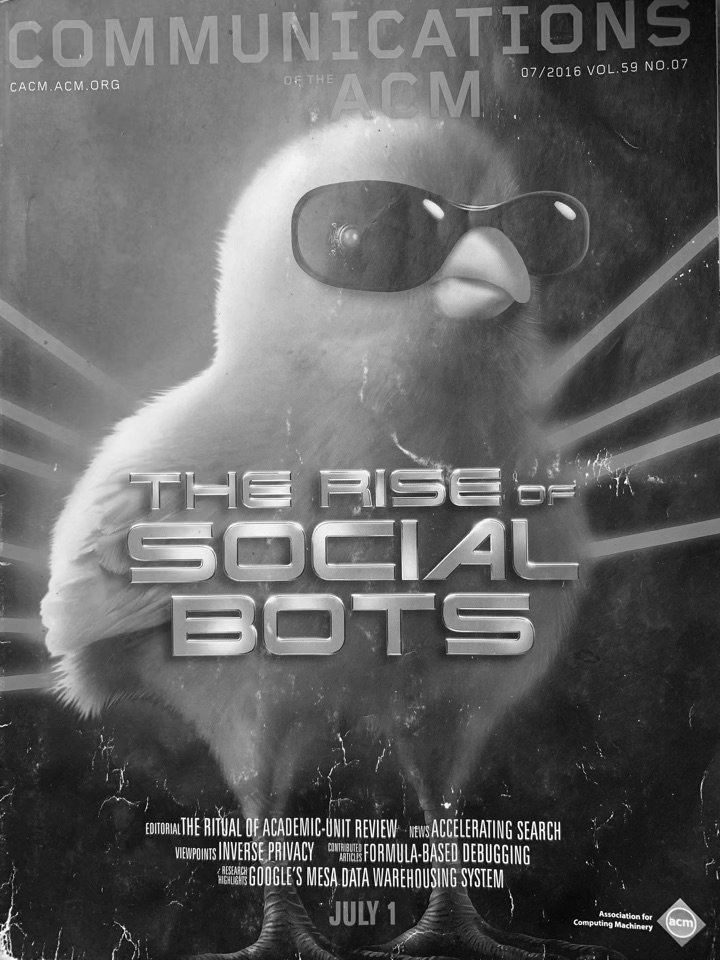

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/text/text3.jpg


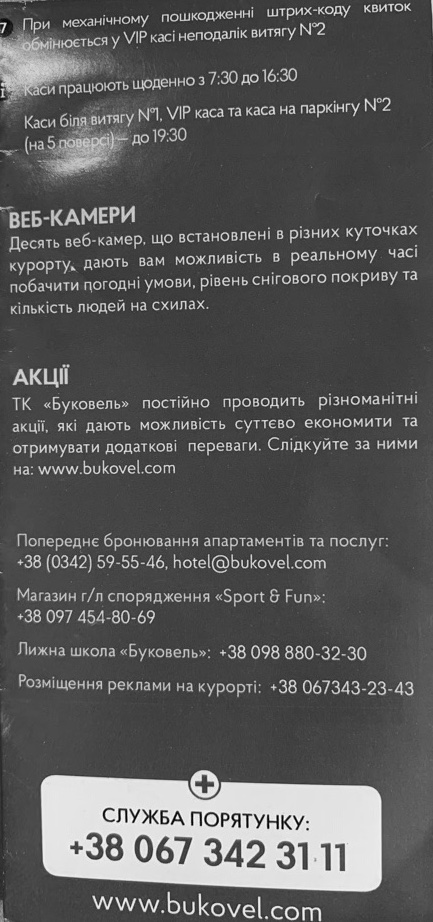

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/text/text4.jpg


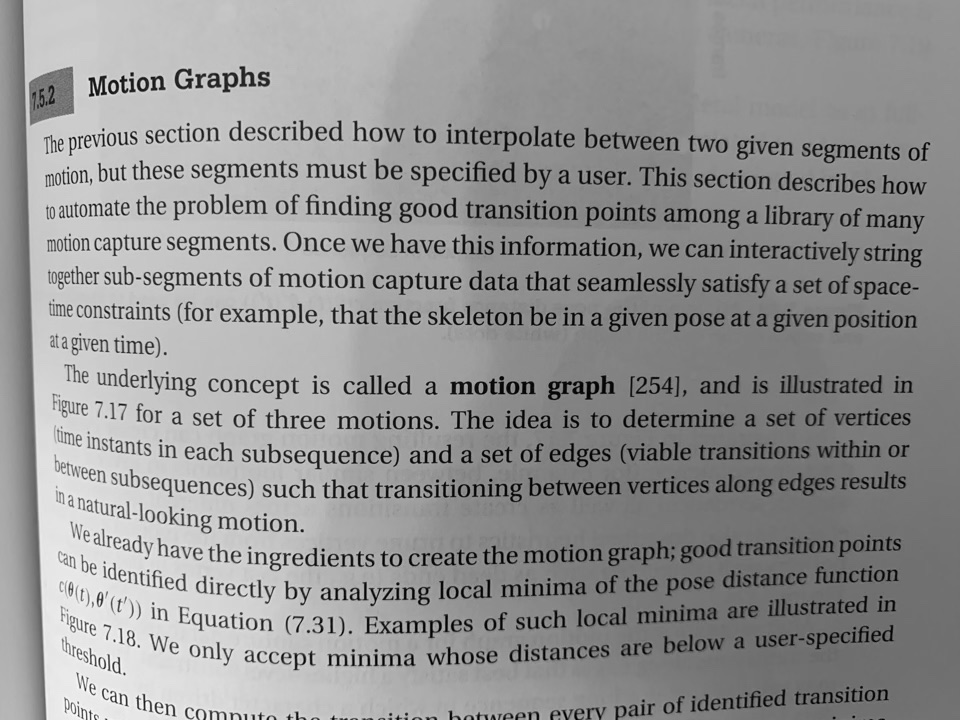

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/text/text5.jpg


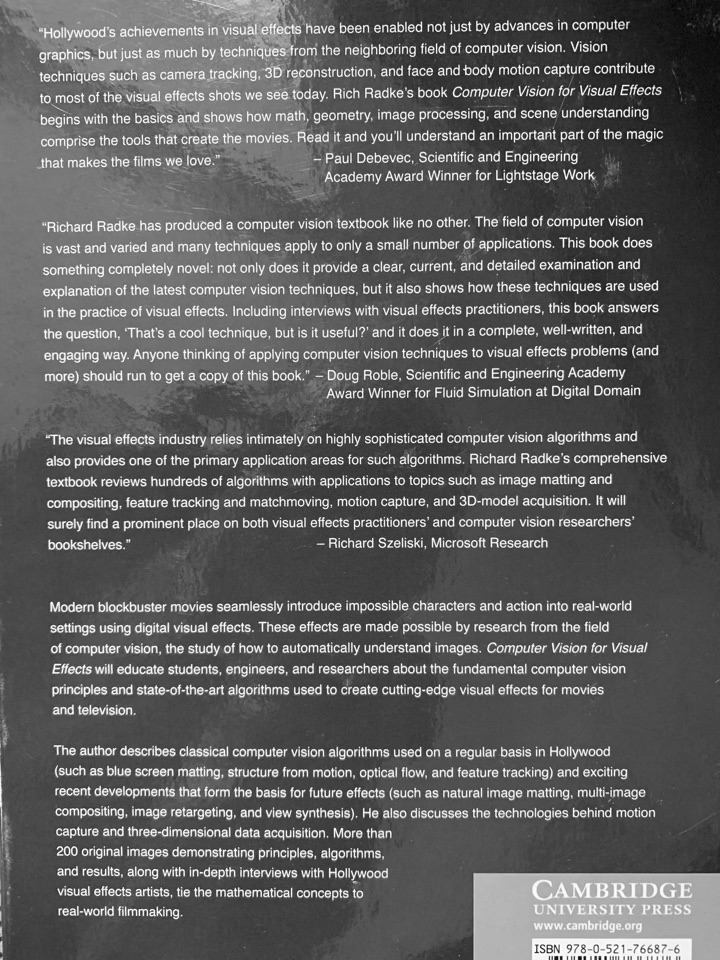

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/text/text6.jpg


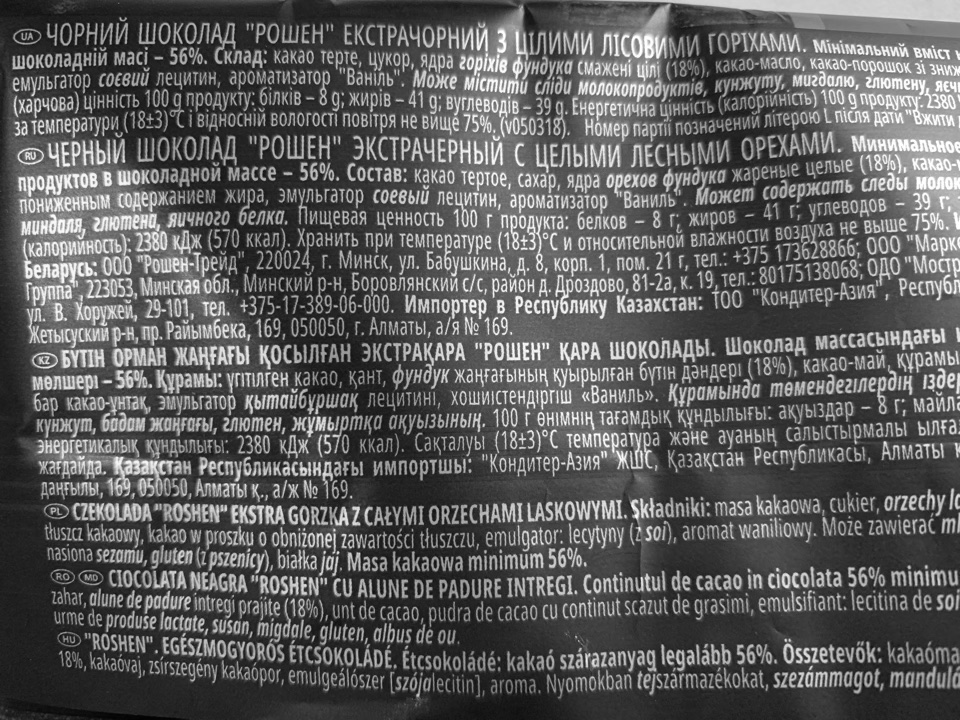

In [8]:
urls = [f"https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/text/text{i+1}.jpg" for i in range(6)]
# url = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/text/text1.jpg"
images, images_gray = [], []

for url in urls:
  img = url_to_image(url)
  images.append(img)
  grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  images_gray.append(grayscaled)
  cv2_imshow(grayscaled)

In [0]:
# retval, threshold = cv2.threshold(images_gray[0], 140, 255, cv2.THRESH_BINARY)
# cv2_imshow(threshold)

# Image #1

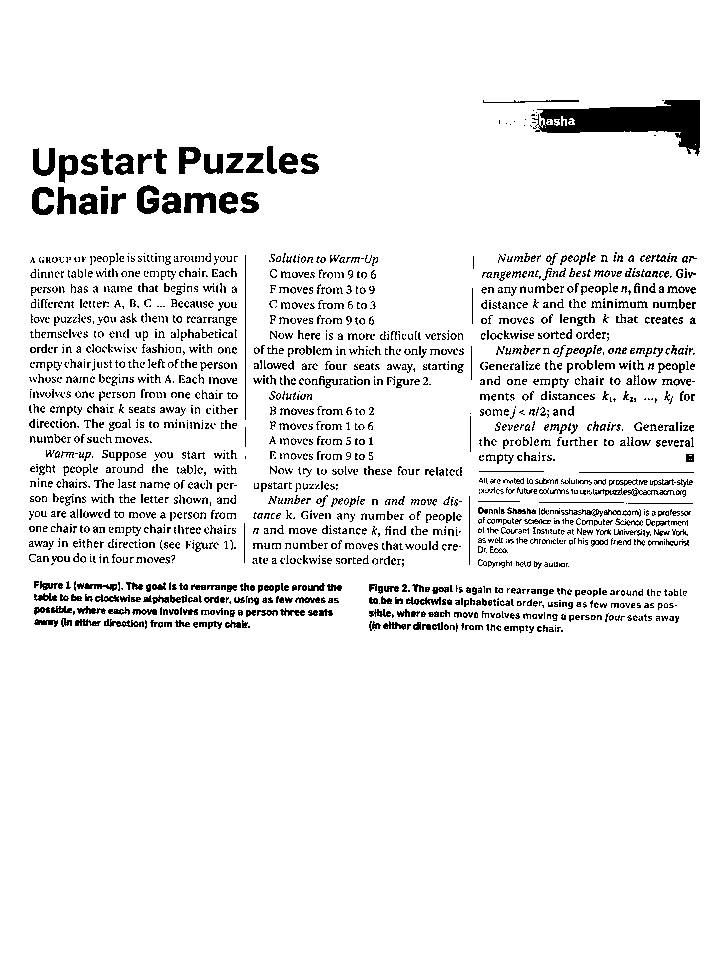

In [69]:
edges = cv2.Canny(images_gray[0], 100, 200)
text1 = images_gray[0][100:570, 20:700]

retval, threshold = cv2.threshold(text1, 140, 255, cv2.THRESH_BINARY)
img = np.full(images_gray[0].copy().shape, 255) 
img[100:570, 20:700] = threshold


text2 = images_gray[0][570:650, 20:700]
retval, threshold = cv2.threshold(255 - text2, 90, 255, cv2.THRESH_BINARY)
h, w = threshold.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(threshold, mask, (0,0), 255)
img[570:650, 20:700] = threshold

cv2_imshow(img)

# Image #2

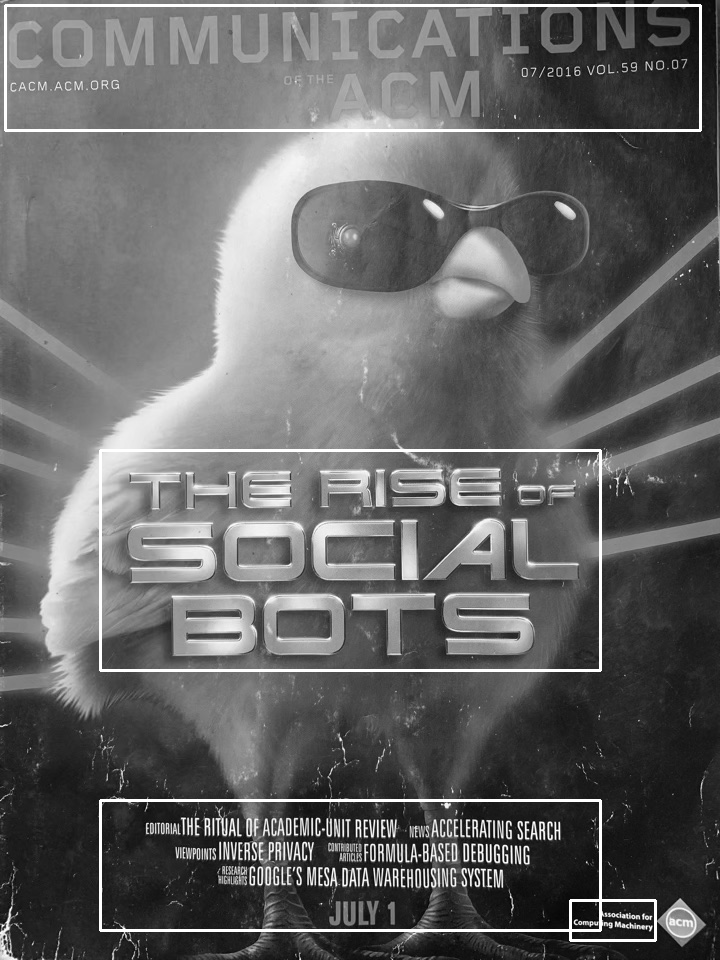

In [345]:
img = images_gray[1].copy()

cv2.rectangle(img, (5,5), (700,130), 255, 2)
cv2.rectangle(img, (100,450), (600,670), 255, 2)
cv2.rectangle(img, (100,800), (600,930), 255, 2)
cv2.rectangle(img, (570,900), (655,940), 255, 2)

cv2_imshow(img)

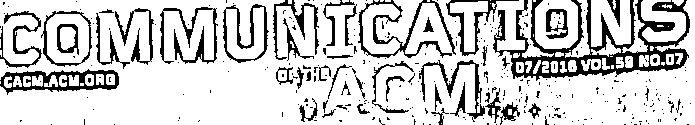

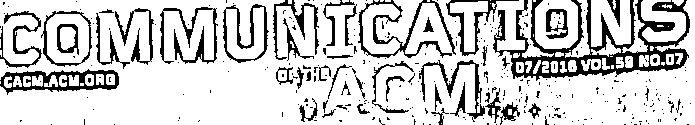

In [156]:
img = images_gray[1].copy()
text1 = img[5:130, 5:700]
# text1 = cv2.GaussianBlur(text1, (5,5), 0)
# edges = cv2.Canny(text1, 100, 200)
kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(text1, kernel, iterations = 1)
edges = cv2.Canny(text1, 100, 200)
gradient = cv2.morphologyEx(text1, cv2.MORPH_GRADIENT, kernel)

threshold = cv2.adaptiveThreshold(dilation, 255,
                          cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                          cv2.THRESH_BINARY, 15, 5)


# cv2_imshow(dilation)
# cv2_imshow(gradient)

# threshold = 255 - threshold
# h, w = threshold.shape[:2]
# mask = np.zeros((h+2, w+2), np.uint8)
# cv2.floodFill(threshold, mask, (100,20), 255)

# threshold = 255 - threshold
blured = cv2.GaussianBlur(threshold, (7,7), 0)

cv2_imshow(threshold)

h, w = blured.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(threshold, mask, (0,0), 255)

# cv2.floodFill(blured, mask, (0,0), 255)
cv2_imshow(threshold)
# cv2_imshow(255 - threshold)

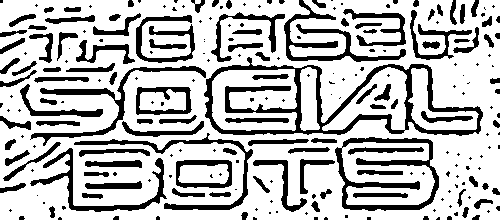

In [293]:
img = images_gray[1].copy()
text2 = img[450:670, 100:600]

threshold = cv2.adaptiveThreshold(text2, 255,
                          cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                          cv2.THRESH_BINARY, 15, 5)
blured = cv2.GaussianBlur(threshold, (7,7), 0)

threshold = cv2.adaptiveThreshold(blured, 255,
                          cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                          cv2.THRESH_BINARY, 15, 15)
blured = cv2.GaussianBlur(threshold, (11,11), 0)

threshold = cv2.adaptiveThreshold(blured, 255,
                          cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                          cv2.THRESH_BINARY, 15, 15)

blured = cv2.GaussianBlur(threshold, (11,11), 0)

threshold = cv2.adaptiveThreshold(blured, 255,
                          cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                          cv2.THRESH_BINARY, 15, 15)

# cv2_imshow(threshold)

detector = cv2.SimpleBlobDetector_create()
keypoints = detector.detect(threshold)

for keypoint in keypoints:
  x, y = int(keypoint.pt[0]), int(keypoint.pt[1])
  cv2.circle(threshold, (x, y), 5, 255, 6)
  
cv2_imshow(threshold)
  
# im_with_keypoints = cv2.drawKeypoints(threshold, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# cv2_imshow(im_with_keypoints)


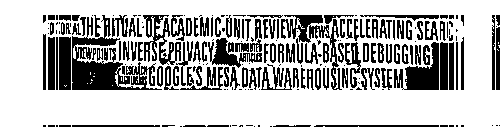

In [334]:
# (100,800), (600,930)
img = images_gray[1].copy()
text3 = img[800:930, 100:600]
threshold = cv2.adaptiveThreshold(text3, 255,
                          cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                          cv2.THRESH_BINARY, 15, 15)
threshold = 255 - threshold
# cv2_imshow(threshold)

threshold_n = threshold.copy()

for i, raw in enumerate(threshold):
  #print(raw.sum())
  if raw.sum() < 20000:
    threshold_n[i] = 255

for i, raw in enumerate(threshold_n[0]):
  #print(raw.sum())
  if threshold_n[:, i].sum() < 15000:
    threshold_n[:, i] = 255  
    
cv2_imshow(threshold_n)

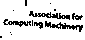

In [344]:
# (570,900), (655,940)
img = images_gray[1].copy()
text4 = img[900:940, 570:655]
text4 = 255-text4

threshold = cv2.adaptiveThreshold(text4, 255,
                          cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                          cv2.THRESH_BINARY, 15, 15)

cv2_imshow(threshold)

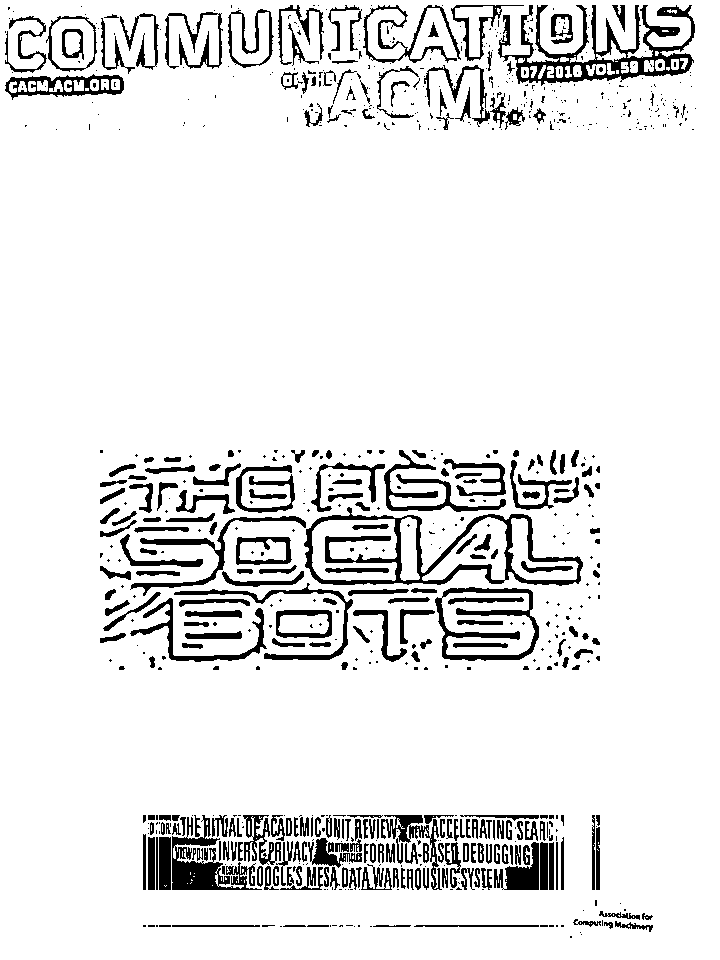

In [356]:
img = images_gray[1].copy()
img_res = np.full(img.shape, 255) 

text1 = img[5:130, 5:700]
kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(text1, kernel, iterations = 1)
edges = cv2.Canny(text1, 100, 200)
gradient = cv2.morphologyEx(text1, cv2.MORPH_GRADIENT, kernel)

threshold = cv2.adaptiveThreshold(dilation, 255,
                          cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                          cv2.THRESH_BINARY, 15, 5)
blured = cv2.GaussianBlur(threshold, (7,7), 0)
h, w = blured.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(threshold, mask, (0,0), 255)
# cv2_imshow(threshold)
img_res[5:130, 5:700] = threshold


#-----------
text2 = img[450:670, 100:600]

threshold = cv2.adaptiveThreshold(text2, 255,
                          cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                          cv2.THRESH_BINARY, 15, 5)
blured = cv2.GaussianBlur(threshold, (7,7), 0)

threshold = cv2.adaptiveThreshold(blured, 255,
                          cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                          cv2.THRESH_BINARY, 15, 15)
blured = cv2.GaussianBlur(threshold, (11,11), 0)

threshold = cv2.adaptiveThreshold(blured, 255,
                          cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                          cv2.THRESH_BINARY, 15, 15)

blured = cv2.GaussianBlur(threshold, (11,11), 0)

threshold = cv2.adaptiveThreshold(blured, 255,
                          cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                          cv2.THRESH_BINARY, 15, 15)
detector = cv2.SimpleBlobDetector_create()
keypoints = detector.detect(threshold)
for keypoint in keypoints:
  x, y = int(keypoint.pt[0]), int(keypoint.pt[1])
  cv2.circle(threshold, (x, y), 5, 255, 6)
  
# cv2_imshow(threshold)
img_res[450:670, 100:600] = threshold
#-----------

text3 = img[800:930, 100:600]
threshold = cv2.adaptiveThreshold(text3, 255,
                          cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                          cv2.THRESH_BINARY, 15, 15)
threshold = 255 - threshold
# cv2_imshow(threshold)

threshold_n = threshold.copy()

for i, raw in enumerate(threshold):
  #print(raw.sum())
  if raw.sum() < 20000:
    threshold_n[i] = 255

for i, raw in enumerate(threshold_n[0]):
  #print(raw.sum())
  if threshold_n[:, i].sum() < 15000:
    threshold_n[:, i] = 255  
    
img_res[800:930, 100:600] = threshold_n

# -------
# img = images_gray[1].copy()
text4 = img[900:940, 570:655]
text4 = 255-text4

threshold = cv2.adaptiveThreshold(text4, 255,
                          cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                          cv2.THRESH_BINARY, 15, 15)
img_res[900:940, 570:655] = threshold

cv2_imshow(img_res)

# Image #3

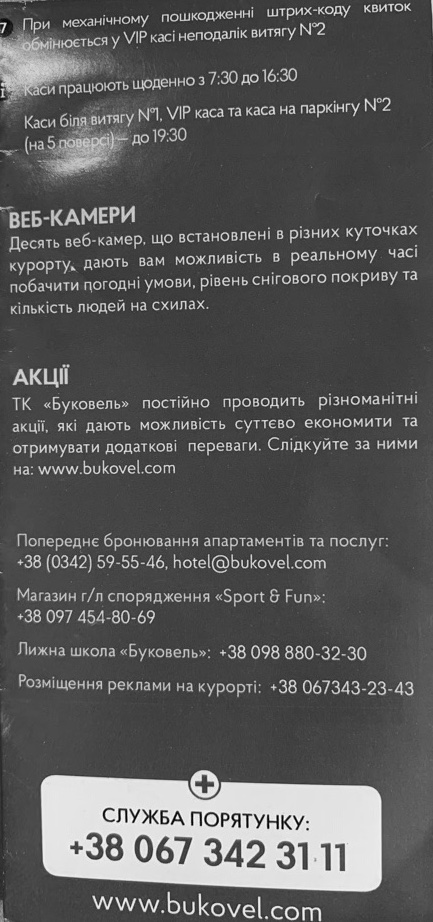

In [357]:
img = images_gray[2].copy()

cv2_imshow(img)

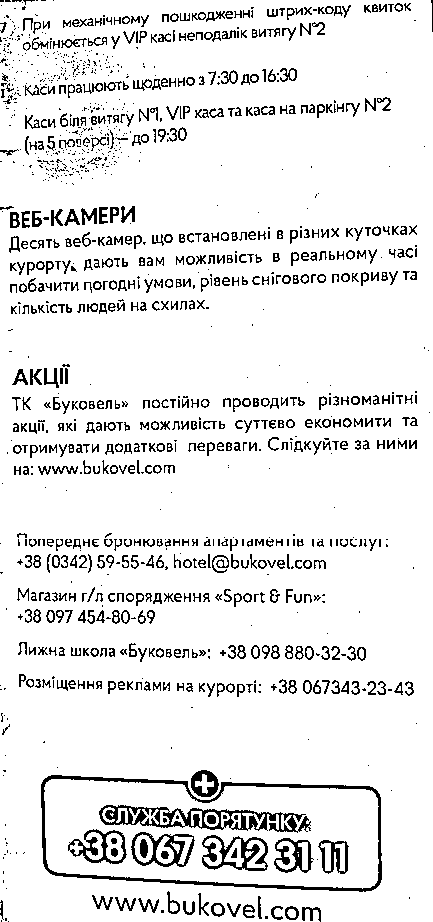

In [368]:
img = images_gray[2].copy()

img = 255 - img

threshold = cv2.adaptiveThreshold(img, 255,
                          cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                          cv2.THRESH_BINARY, 15, 15)

for i, raw in enumerate(threshold):
  # print(raw.sum())
  if raw.sum() < 60000:
    threshold[i] = 255
cv2_imshow(threshold)

# Image #4

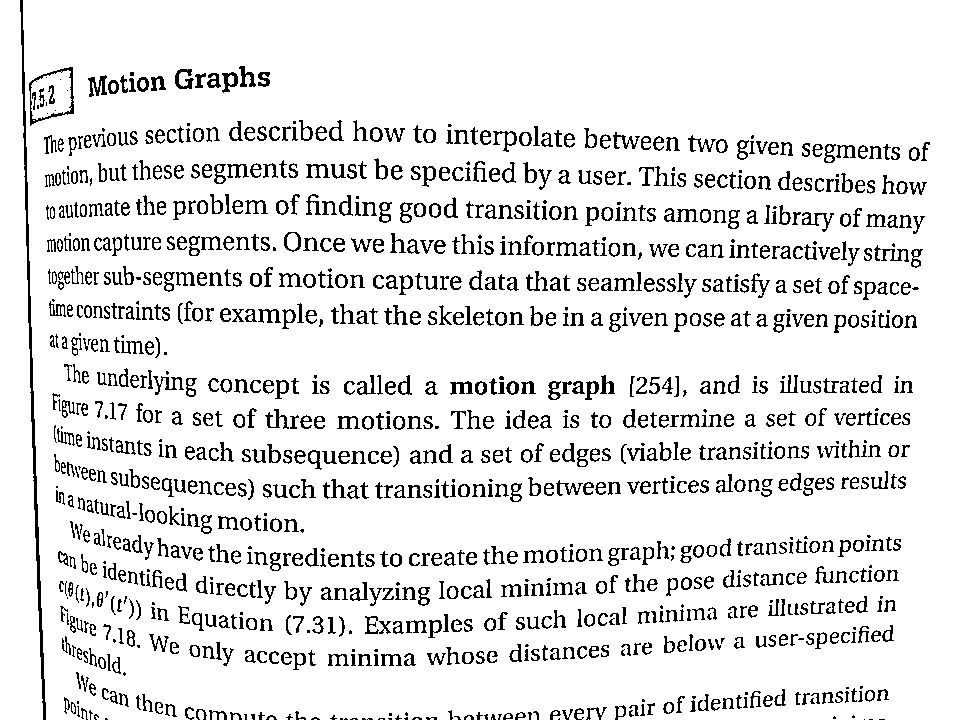

In [370]:
img = images_gray[3].copy()
threshold = cv2.adaptiveThreshold(img, 255,
                          cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                          cv2.THRESH_BINARY, 15, 15)
cv2_imshow(threshold)

# Image #5

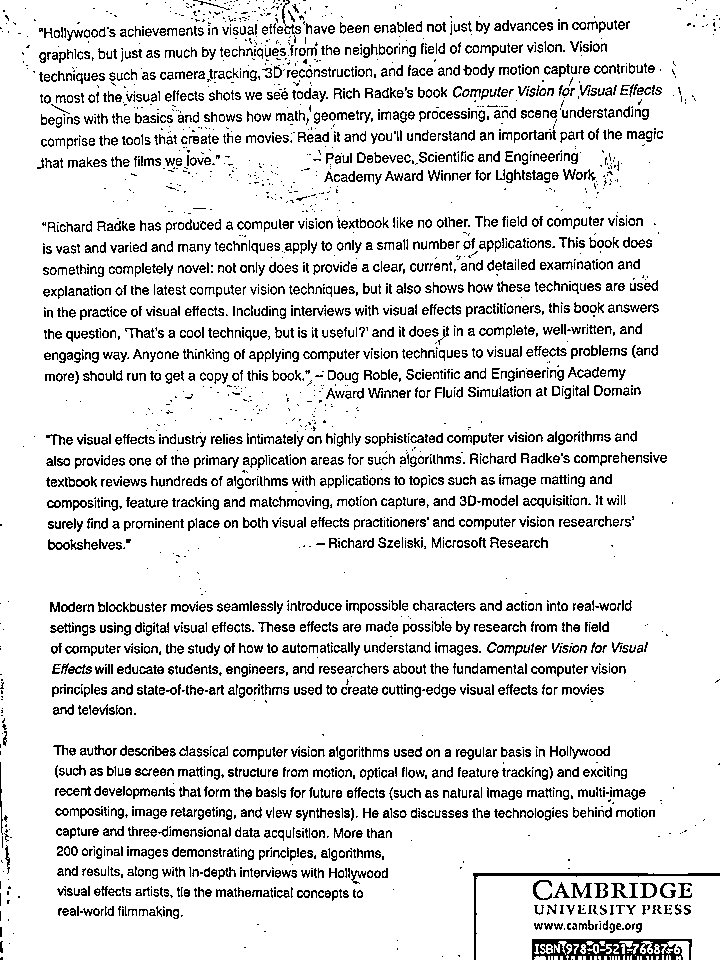

In [373]:
img = images_gray[4].copy()
threshold = cv2.adaptiveThreshold(255-img, 255,
                          cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                          cv2.THRESH_BINARY, 15, 15)
cv2_imshow(threshold)

# Image #6

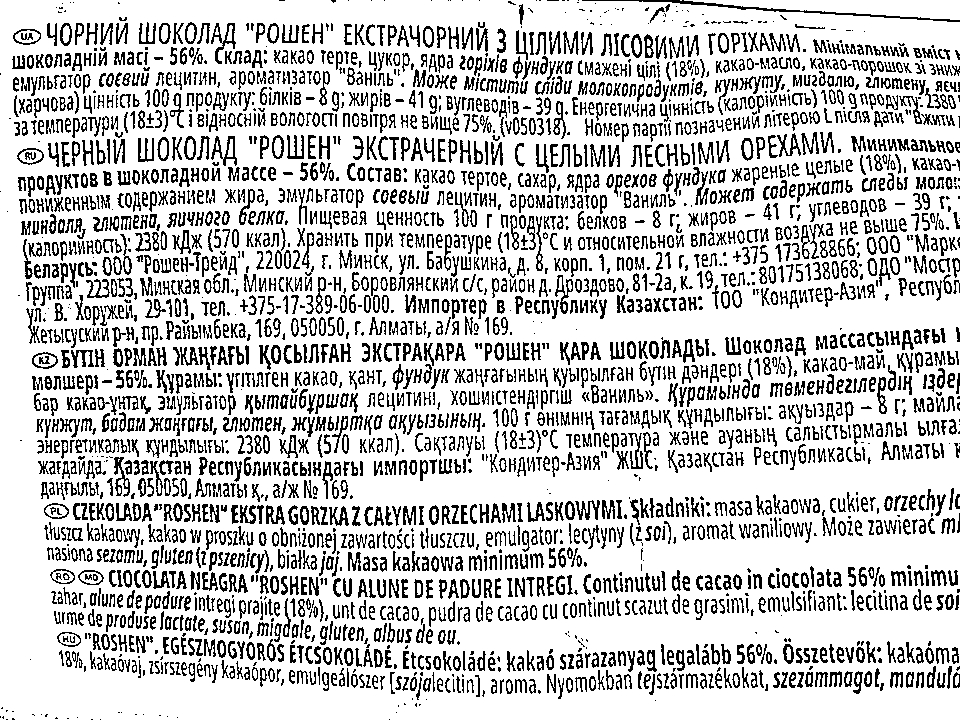

In [374]:
img = images_gray[5].copy()
threshold = cv2.adaptiveThreshold(255-img, 255,
                          cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                          cv2.THRESH_BINARY, 15, 15)
cv2_imshow(threshold)